In [104]:
#installing dependenices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [105]:
#importing data sources

Islamabad_data=pd.read_csv('Islamabad_data.csv')
karachi_data=pd.read_csv('karachi_data.csv')
Quetta_data=pd.read_csv('Quetta_data.csv')
Lahore_data=pd.read_csv('Lahore_data.csv')
Peshawar_data=pd.read_csv('Peshawar_data.csv')
Multan_data=pd.read_csv('Multan_data.csv')

In [106]:
Islamabad_data.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,...,Runs.1,Wkts,BBI,Ave.1,Econ,SR.1,4,5,Ct,St
0,0,Ahmed Safi Abdullah,2020-2020,3,2,2,9,8*,-,13,...,65,4,2/17,16.25,8.12,12.0,0,0,0,0
1,1,Akif Javed,2020-2020,6,1,1,0,0*,-,2,...,125,4,1/20,31.25,8.33,22.5,0,0,1,0
2,2,Amad Butt,2017-2020,16,9,2,60,17,8.57,57,...,375,15,4/27,25.00,9.18,16.3,1,0,8,0
3,3,Ashar Zaidi,2016-2016,3,2,0,8,6,4.00,16,...,59,0,-,-,7.37,-,0,0,0,0
4,4,Asif Ali,2016-2020,43,36,10,655,70,25.19,401,...,-,-,-,-,-,-,-,-,20,0


In [107]:
Islamabad_data.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s', 'Player.1', 'Span.1',
       'Mat.1', 'Inns.1', 'Overs', 'Mdns', 'Runs.1', 'Wkts', 'BBI', 'Ave.1',
       'Econ', 'SR.1', '4', '5', 'Ct', 'St'],
      dtype='object')

__All the columns with .1 are copy of already existing columns__

In [108]:
def remove_columns(x):
    for i in x:
        i=i.drop(['Unnamed: 0','Player.1','Span.1','Inns.1','Mat.1'],inplace=True,axis=1)
    

In [109]:
remove_columns([Islamabad_data,Quetta_data,Lahore_data,Multan_data,Peshawar_data,karachi_data])

In [110]:
Lahore_data.shape

(71, 27)

In [111]:
All_Players_data= pd.concat([Lahore_data,Peshawar_data,Islamabad_data,Quetta_data,Multan_data,karachi_data],axis=0) 

In [112]:
All_Players_data.rename(columns={'Runs.1':'Runs_Conceded','Runs':'Runs_Scored',
                                 'Ave':'BattingAvg','Ave.1':'BowlingAvg',
                                'SR':'BattingSR','SR.1':'BowlingSR'},inplace=True)

In [113]:
All_Players_data.sort_values(by='Player',inplace=True)

In [114]:
All_Players_data.reset_index(drop=True,inplace=True)

In [115]:
# To check for players who played for different teams during different seasons of PSL

All_Players_data[All_Players_data.duplicated('Player')].head()

,Player,Span,Mat,Inns,NO,Runs_Scored,HS,BattingAvg,BF,BattingSR,...,Runs_Conceded,Wkts,BBI,BowlingAvg,Econ,BowlingSR,4,5,Ct,St
2,AD Hales,2018-2019,6,6,0,129,46,21.50,112,115.17,...,-,-,-,-,-,-,-,-,6,0
4,AD Russell,2019-2019,4,4,0,50,18,12.50,30,166.66,...,118,1,1/25,118.00,10.72,66.0,0,0,2,0
9,Aamer Yamin,2016-2016,2,-,-,-,-,-,-,-,...,54,1,1/21,54.00,7.71,42.0,0,0,0,0
10,Aamer Yamin,2017-2018,5,4,0,27,25,6.75,30,90.00,...,126,4,3/17,31.50,8.40,22.5,0,0,3,0
19,Ahmed Shehzad,2018-2018,10,9,0,173,38,19.22,203,85.22,...,-,-,-,-,-,-,-,-,7,0


In [116]:
All_Players_data.replace(to_replace='-',value=0,inplace=True)

In [117]:
All_Players_data['HS']=All_Players_data['HS'].astype('str')

In [118]:
All_Players_data['HS_NO']=pd.Series()
import re
for i in range(All_Players_data.shape[0]):
    star=re.findall(r'[*]{1}',All_Players_data['HS'][i])
    if star:
        All_Players_data.loc[i,'HS_NO']=1
    else:
        All_Players_data.loc[i,'HS_NO']=0
    x=re.findall(r'^\d+',All_Players_data['HS'][i])
    All_Players_data.loc[i,'HS']=x

In [119]:
from fractions import Fraction

In [120]:
# Correct duplicated entries

for i in range(All_Players_data.shape[0]-1):
    
    if All_Players_data.loc[i,'Player'] == All_Players_data.loc[i+1,'Player']:
        
        for column in ['Mat','Inns','NO','Runs_Scored','BF','0','100','50','4s','6s','100','Mdns','Wkts','Econ',
                           '4','5','Ct','St','Runs_Conceded','Overs']:
            All_Players_data[column] = All_Players_data[column].astype(dtype='float')  
            All_Players_data.loc[i,column]=sum([All_Players_data.loc[i+1,column],All_Players_data.loc[i,column]])
            
            
for i in range(All_Players_data.shape[0]-1):
    
    if All_Players_data.loc[i,'Player'] == All_Players_data.loc[i+1,'Player']:
        
        #changing HS values
        All_Players_data.loc[i,'HS'] = max(All_Players_data.loc[i+1,'HS'],All_Players_data.loc[i,'HS'])
        
        
        # Calculating new Average values
        if All_Players_data.loc[i,'Inns'] == 0:
            All_Players_data.loc[i,'BattingAvg'] = 0
        else:
            All_Players_data.loc[i,'BattingAvg'] =np.divide(All_Players_data.loc[i,'Runs_Scored'],All_Players_data.loc[i,'Inns'])
        
        #Calculating new SR values
        if All_Players_data.loc[i,'BF'] == 0:
            All_Players_data.loc[i,'BattingSR'] = 0
        else:
            All_Players_data.loc[i,'BattingSR'] = np.divide(All_Players_data.loc[i,'Runs_Scored'],All_Players_data.loc[i,'BF']) * 100
        
        # Setting Best bowling figures BBI values for players
        if Fraction(All_Players_data.loc[i+1,'BBI']).numerator > Fraction(All_Players_data.loc[i,'BBI']).numerator:
            All_Players_data.loc[i,'BBI'] = All_Players_data.loc[i+1,'BBI']
        else:
            All_Players_data.loc[i,'BBI'] = All_Players_data.loc[i,'BBI']

In [121]:
index_list=[]
for i in range(All_Players_data.shape[0]-1):
    if All_Players_data.loc[i,'Player'] == All_Players_data.loc[i+1,'Player']:
        index_list.append(i+1)

In [122]:
Cleaned_All_Players_data=All_Players_data.drop(index=index_list)

In [123]:
Cleaned_All_Players_data.reset_index(drop=True,inplace=True)

In [125]:
Cleaned_All_Players_data.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs_Scored', 'HS',
       'BattingAvg', 'BF', 'BattingSR', '100', '50', '0', '4s', '6s', 'Overs',
       'Mdns', 'Runs_Conceded', 'Wkts', 'BBI', 'BowlingAvg', 'Econ',
       'BowlingSR', '4', '5', 'Ct', 'St', 'HS_NO'],
      dtype='object')

In [134]:
Cleaned_All_Players_data.head()

,Player,Span,Mat,Inns,NO,Runs_Scored,HS,BattingAvg,BF,BattingSR,...,BBI,BowlingAvg,Econ,BowlingSR,4,5,Ct,St,HS_NO,BP%
0,AB de Villiers,2019-2019,7.0,7.0,3.0,218.0,52,54.50,169.0,128.99,...,0,0,0.00,0,0.0,0.0,2.0,0.0,1.0,14.201183
1,AD Hales,2020-2020,13.0,11.0,1.0,368.0,80,33.4545,265.0,138.868,...,0,0,0.00,0,0.0,0.0,8.0,0.0,1.0,19.245283
2,AD Russell,2016-2018,18.0,16.0,2.0,160.0,35,10,122.0,131.148,...,3/18,18.25,18.95,13.3,0.0,0.0,8.0,0.0,1.0,18.852459
3,ADS Fletcher,2018-2019,9.0,9.0,0.0,158.0,34,17.55,138.0,114.49,...,0,0,0.00,0,0.0,0.0,2.0,0.0,0.0,15.942029
4,AP Devcich,2018-2019,10.0,10.0,0.0,279.0,70,27.90,205.0,136.09,...,0,0,15.50,0,0.0,0.0,2.0,0.0,0.0,18.536585


In [135]:
Cleaned_All_Players_data.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs_Scored', 'HS',
       'BattingAvg', 'BF', 'BattingSR', '100', '50', '0', '4s', '6s', 'Overs',
       'Mdns', 'Runs_Conceded', 'Wkts', 'BBI', 'BowlingAvg', 'Econ',
       'BowlingSR', '4', '5', 'Ct', 'St', 'HS_NO', 'BP%'],
      dtype='object')

### Feature Engineering

Although we have created one feature of __HS_NO__ which means person who was not out when he scored his highest score.

In [136]:
# Boundary percentage feature: BP%

Cleaned_All_Players_data['BP%']=0

for i in range(Cleaned_All_Players_data.shape[0]):
    if Cleaned_All_Players_data.loc[i,'BF'] == 0:
        Cleaned_All_Players_data.loc[i,'BP%'] = 0
    else:
        boundaries_ar=sum([Cleaned_All_Players_data.loc[i,'4s'],Cleaned_All_Players_data.loc[i,'6s']]) 
        Cleaned_All_Players_data.loc[i,'BP%']= np.divide(boundaries_ar,Cleaned_All_Players_data.loc[i,'BF']) * 100 

In [137]:
## Dropping players with 0 Inns as batting or 1 0r 2 total matches
less_matches= Cleaned_All_Players_data['Mat'] <= 3
less_Inns= Cleaned_All_Players_data['Inns'] <= 3

values_ar=Cleaned_All_Players_data[less_Inns | less_matches ].index

Cleaned_All_Players_data=Cleaned_All_Players_data.drop(index=values_ar)
Cleaned_All_Players_data.reset_index(drop=True,inplace=True)

In [138]:
# Let's divide the BBI:Best bowling figures feature into wickets and runs for ML model
Cleaned_All_Players_data['BBI_Wickets']=pd.Series()
Cleaned_All_Players_data['BBI_Runs']=pd.Series()

for i in range(Cleaned_All_Players_data.shape[0]):
    Cleaned_All_Players_data.loc[i,'BBI_Wickets']= Fraction(Cleaned_All_Players_data.loc[i,'BBI']).numerator
    Cleaned_All_Players_data.loc[i,'BBI_Runs']=Fraction(Cleaned_All_Players_data.loc[i,'BBI']).denominator

In [139]:
Cleaned_All_Players_data[['BBI_Wickets','BBI_Runs']].tail()

,BBI_Wickets,BBI_Runs
132,4.0,7.0
133,3.0,25.0
134,0.0,1.0
135,2.0,35.0
136,2.0,17.0


In [140]:
# Span feature will be left out of the ML models
data=np.array(Cleaned_All_Players_data.drop(columns=['Span','Player','BBI']))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(X=data)

### Unsupervised learning Methods:

__1.PCA__

__2.KMeans__

__3.GMM__

In [141]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [142]:
pca= PCA(n_components=2)
pca.fit(data_scaled)
principal_comp=pca.fit_transform(data_scaled)

In [143]:
pca.explained_variance_ratio_

array([0.32460372, 0.25068881])

In [144]:
pca_data=pd.DataFrame(data=principal_comp,columns=['PC_1','PC_2'])
pca_data=pd.concat([Cleaned_All_Players_data['Player'],pca_data],axis=1)

In [145]:
pca_data.head()

,Player,PC_1,PC_2
0,AB de Villiers,1.104594,-2.888294
1,AD Hales,2.177016,-2.117573
2,AD Russell,-1.126571,0.685531
3,ADS Fletcher,-0.147981,-2.905190
4,AP Devcich,1.027722,-2.216634


___VISUALIZING PCA___

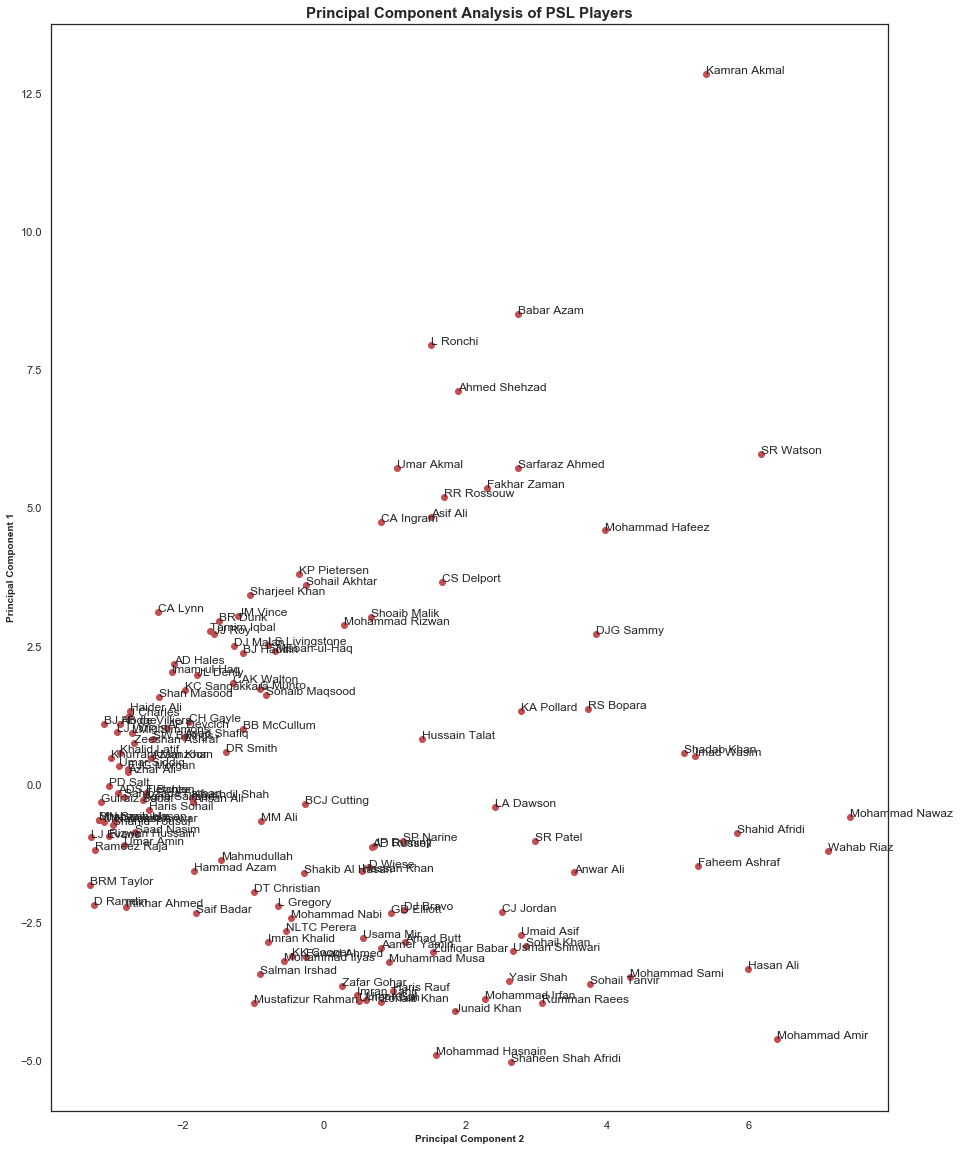

In [146]:
## Set the canvas
sns.set(style='white')
fig=plt.figure(figsize=(15,20))
sns.despine(left=True)
ax=fig.gca()


##Create Plot
plt.scatter(pca_data.PC_2,pca_data.PC_1,c=['r'])
for i in range(pca_data.shape[0]):
    plt.annotate(Cleaned_All_Players_data.loc[i,'Player'],[pca_data.loc[i,'PC_2'],pca_data.loc[i,'PC_1']],
                 xytext=[pca_data.loc[i,'PC_2'],pca_data.loc[i,'PC_1']])
    
## Labelling and final touches
plt.title('Principal Component Analysis of PSL Players',fontweight='semibold',fontsize=15)
ax.set_xlabel('Principal Component 2',fontsize=10,fontweight='semibold')
ax.set_ylabel('Principal Component 1',fontsize=10,fontweight='semibold')
plt.show()

#### important observations:

___1. PC1 is giving more weight to batting attributes while PC2 to bowling attributes. Kamran Akmal (Highest Scorer of PSL) is leader on PC1 while Muhammad Amir on PC2___

___2.We need feature/match attributes as local players who have played more matches are definitely gaining an edge___



In [147]:
pca.explained_variance_ratio_

array([0.32460372, 0.25068881])

___This explains not clear variance between players as total varinace explained by two components is around 57%.___

___2.KMeans___

In [148]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,calinski_harabaz_score

<Figure size 432x288 with 0 Axes>

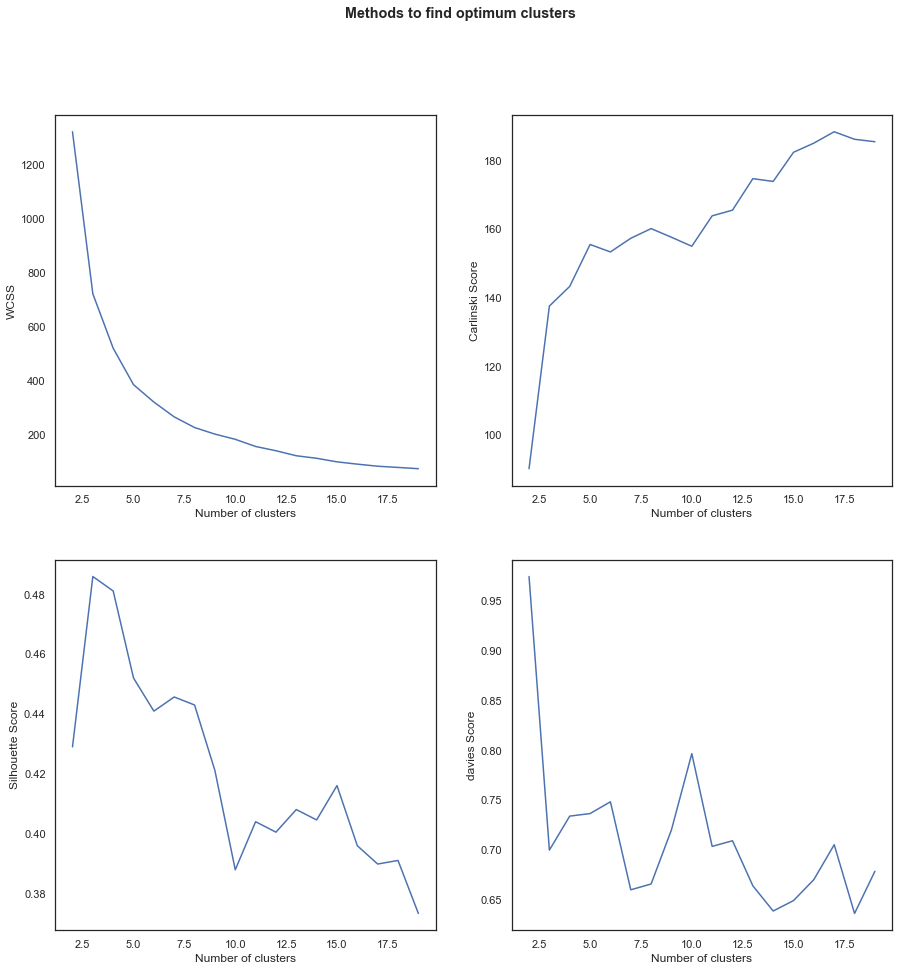

In [149]:
# Find the optimal number of clusters by different methods

cs_list=[]
ss_list=[]
db_list=[]
wcss = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data[['PC_1','PC_2']])
    wcss.append(kmeans.inertia_)
    cs=calinski_harabaz_score(pca_data[['PC_1','PC_2']],kmeans.labels_)
    cs_list.append(cs)
    ss=silhouette_score(pca_data[['PC_1','PC_2']],kmeans.labels_)
    ss_list.append(ss)
    db=davies_bouldin_score(pca_data[['PC_1','PC_2']],kmeans.labels_)
    db_list.append(db)
    

# Set canvas
sns.set(style='white')
sns.despine(left=True)
fig=plt.figure(figsize=(15,15))

#Create plot
plt.subplot(2,2,1)
plt.plot(range(2, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(2,2,2)
plt.plot(range(2, 20), cs_list)
plt.xlabel('Number of clusters')
plt.ylabel('Carlinski Score')


plt.subplot(2,2,3)
plt.plot(range(2, 20), ss_list)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


plt.subplot(2,2,4)
plt.plot(range(2, 20), db_list)
plt.xlabel('Number of clusters')
plt.ylabel('davies Score')


# final touches
fig.suptitle('Methods to find optimum clusters',fontweight='semibold')
plt.show()

___WCSS:16 clusters   Elbow Method___

___SS Score: 15 clusters   higher Sudden Spike___

___Carlinski Score:16 clusters  Sudden Spike___

___DB Score:14 clusters   lowest Sudden Spike___

___Average: 15 clusters___

In [150]:
kmeans=KMeans(n_clusters=15,max_iter=300)
kmeans_data=kmeans.fit_predict(pca_data[['PC_1','PC_2']])
kmeans_labels=kmeans.labels_

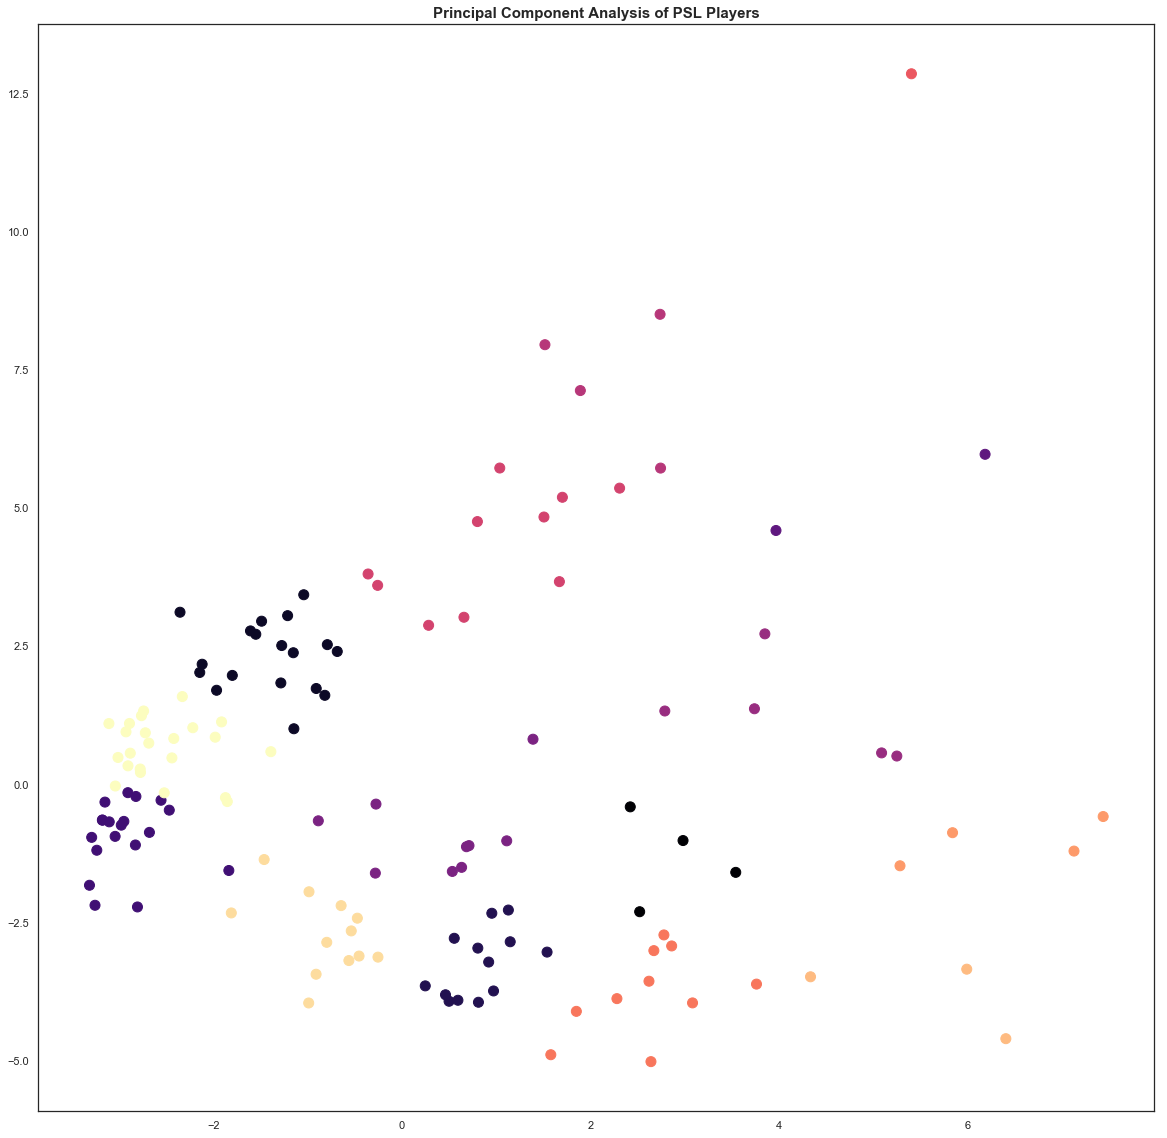

In [151]:
## Set the canvas

sns.set(style='white')
fig=plt.figure(figsize=(20,20))

## create plot
plt.scatter(pca_data.PC_2,pca_data.PC_1,c=kmeans_labels,s=100,cmap='magma')

##for i in range(pca_data.shape[0]):
  ##  plt.annotate(Cleaned_All_Players_data.loc[i,'Player'],[pca_data.loc[i,'PC_2'],pca_data.loc[i,'PC_1']],
    ##             xytext=[pca_data.loc[i,'PC_2'],pca_data.loc[i,'PC_1']])
    
## Labelling and final touches
plt.title('Principal Component Analysis of PSL Players',fontweight='semibold',fontsize=15)
ax.set_xlabel('Principal Component 2',fontsize=10,fontweight='semibold')
ax.set_ylabel('Principal Component 1',fontsize=10,fontweight='semibold')
plt.show()

In [152]:
player_clusters_km= pd.DataFrame({'Cluster A':pca_data.loc[kmeans_data==0,'Player'],
                              'Cluster B':pca_data.loc[kmeans_data==1,'Player'],
                              'Cluster C':pca_data.loc[kmeans_data==2,'Player'],
                              'Cluster D':pca_data.loc[kmeans_data==3,'Player'],
                              'Cluster E':pca_data.loc[kmeans_data==4,'Player'],
                               'Cluster F':pca_data.loc[kmeans_data==5,'Player'],
                                 'Cluster G':pca_data.loc[kmeans_data==6,'Player'],
                                 'Cluster H':pca_data.loc[kmeans_data==7,'Player'],
                                 'Cluster I':pca_data.loc[kmeans_data==8,'Player'],
                                 'Cluster J':pca_data.loc[kmeans_data==9,'Player'],
                                 'Cluster K':pca_data.loc[kmeans_data==10,'Player'],
                                 'Cluster L':pca_data.loc[kmeans_data==11,'Player'],
                                 'Cluster M':pca_data.loc[kmeans_data==12,'Player'],
                                 'Cluster N':pca_data.loc[kmeans_data==13,'Player'],
                                 'Cluster O':pca_data.loc[kmeans_data==14,'Player']})

__Let's test the clusters on some features and see their difference__

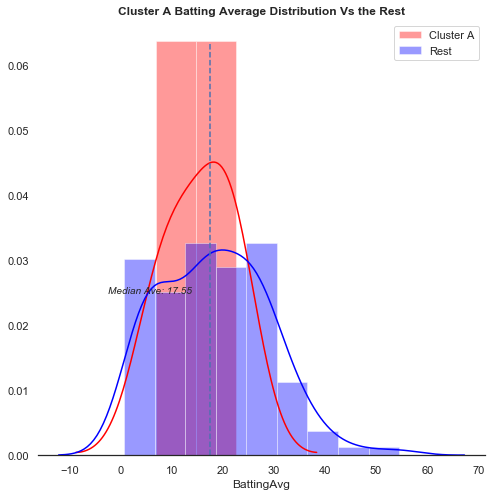

In [153]:
# Let's test each cluster on a particular feature against the rest

## Set the canvas
sns.set(style='white')
fig=plt.figure(figsize=(8,8))

## Create plot

sns.distplot(Cleaned_All_Players_data[player_clusters_km['Cluster A'].notna()]['BattingAvg'].astype('float'),
             color='red',label='Cluster A')
sns.distplot(Cleaned_All_Players_data[player_clusters_km['Cluster A'].isna()]['BattingAvg'].astype('float'),
             color='blue',label='Rest')
sns.despine(left=True)

## Add median line of the data
plt.axvline(Cleaned_All_Players_data['BattingAvg'].median(),
            # Set upper limit for vertical line 
            ymax = 0.95, 
            # Set linestyle to "--"
            linestyle = "--")

# Add text for median line
plt.text(Cleaned_All_Players_data['BattingAvg'].median() - 20, 0.025,
         # Create text 
         'Median Ave: ' + str(round(Cleaned_All_Players_data['BattingAvg'].median(),2)), 
         # Set text style
         fontsize = 10, 
         style = "italic")

##final touches
plt.legend(loc='best')
plt.title('Cluster A Batting Average Distribution Vs the Rest',fontweight='semibold')
plt.show()

___3.GMM(Gaussian Mixture Modelling___

Distribution Based Clustering unlike KMeans which is a distance based method(Hence every cluster has a circular shape even if data is distrubuted in any other form)

In [154]:
from sklearn.mixture import GaussianMixture as GMM

<Figure size 432x288 with 0 Axes>

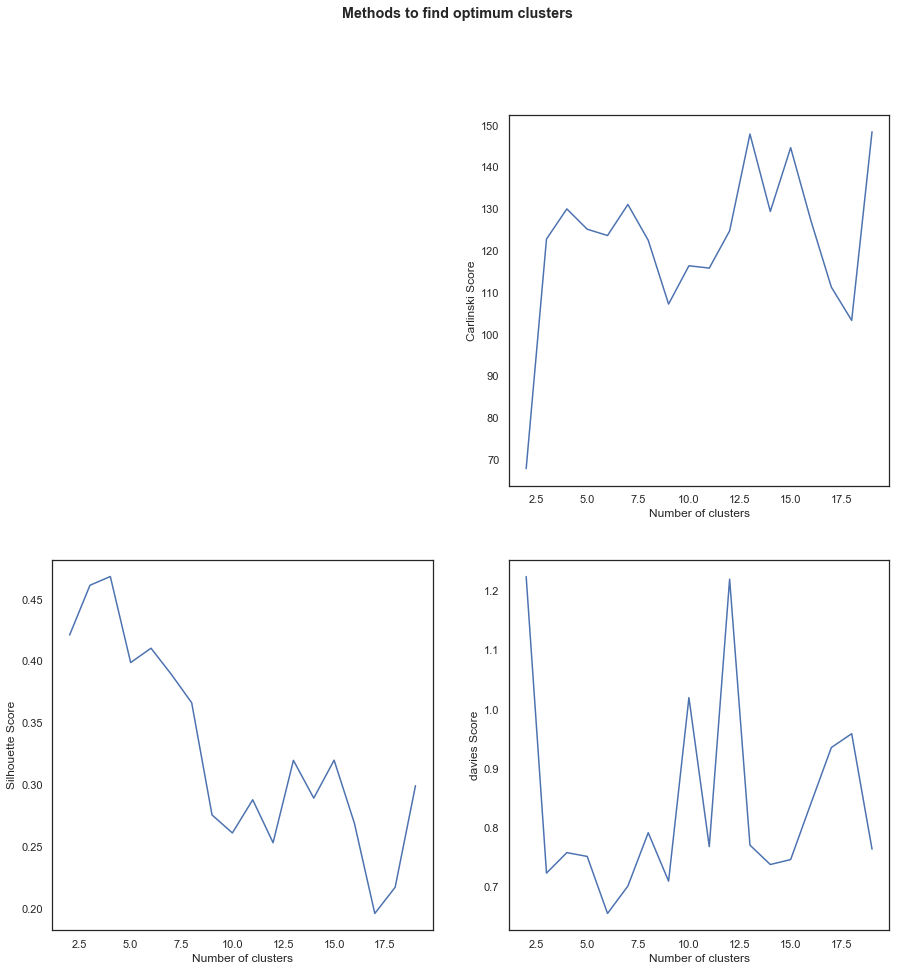

In [155]:
cs_list_gmm=[]
ss_list_gmm=[]
db_list_gmm=[]

for i in range(2, 20):
    gmm = GMM(n_components=i, max_iter=300)
    gmm.fit(pca_data[['PC_1','PC_2']])
    labels=gmm.predict(pca_data[['PC_1','PC_2']])
    cs=calinski_harabaz_score(pca_data[['PC_1','PC_2']],labels)
    cs_list_gmm.append(cs)
    ss=silhouette_score(pca_data[['PC_1','PC_2']],labels)
    ss_list_gmm.append(ss)
    db=davies_bouldin_score(pca_data[['PC_1','PC_2']],labels)
    db_list_gmm.append(db)
    

# Set canvas
sns.set(style='white')
sns.despine(left=True)
fig=plt.figure(figsize=(15,15))

#Create plot

plt.subplot(2,2,2)
plt.plot(range(2, 20), cs_list_gmm)
plt.xlabel('Number of clusters')
plt.ylabel('Carlinski Score')


plt.subplot(2,2,3)
plt.plot(range(2, 20), ss_list_gmm)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


plt.subplot(2,2,4)
plt.plot(range(2, 20), db_list_gmm)
plt.xlabel('Number of clusters')
plt.ylabel('davies Score')


# final touches
fig.suptitle('Methods to find optimum clusters',fontweight='semibold')
plt.show()

___Average:14 Clusters___

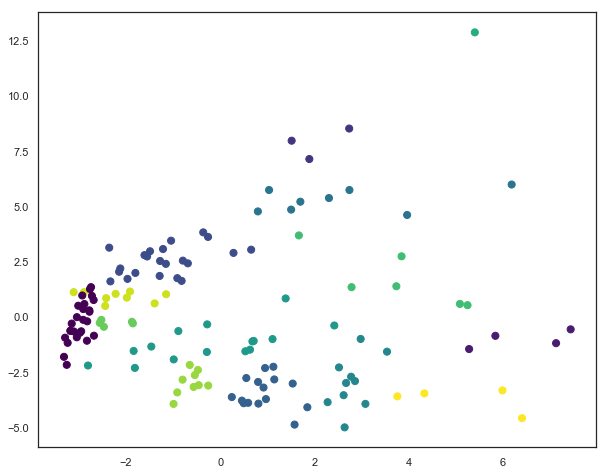

In [156]:
## Let's visualize with 4 clusters

gmm_ss=GMM(n_components=14).fit(pca_data[['PC_1','PC_2']])
gmm_labels= gmm_ss.predict(pca_data[['PC_1','PC_2']])
probs=gmm_ss.predict_proba(pca_data[['PC_1','PC_2']])

## Create figure

plt.figure(figsize = (10,8))
plt.scatter(pca_data.loc[:, 'PC_2'], pca_data.loc[:,'PC_1'],c=gmm_labels ,s=50, cmap='viridis')


In [157]:
#Let's check the clusters

player_clusters_gmm= pd.DataFrame({'Cluster A':Cleaned_All_Players_data[gmm_labels==0]['Player'],
                                  'Cluster B':Cleaned_All_Players_data[gmm_labels==1]['Player'],
                                  'Cluster C':Cleaned_All_Players_data[gmm_labels==2]['Player'],
                                  'Cluster D':Cleaned_All_Players_data[gmm_labels==3]['Player'],
                                  'Cluster E':Cleaned_All_Players_data[gmm_labels==4]['Player'],
                                  'Cluster F':Cleaned_All_Players_data[gmm_labels==5]['Player'],
                                  'Cluster G':Cleaned_All_Players_data[gmm_labels==6]['Player'],
                                  'Cluster H':Cleaned_All_Players_data[gmm_labels==7]['Player'],
                                  'Cluster F':Cleaned_All_Players_data[gmm_labels==8]['Player'],
                                  'Cluster I':Cleaned_All_Players_data[gmm_labels==9]['Player'],
                                  'Cluster J':Cleaned_All_Players_data[gmm_labels==10]['Player'],
                                  'Cluster K':Cleaned_All_Players_data[gmm_labels==11]['Player'],
                                  'Cluster L':Cleaned_All_Players_data[gmm_labels==12]['Player'],
                                  'Cluster M':Cleaned_All_Players_data[gmm_labels==13]['Player'],
                                  'Cluster N':Cleaned_All_Players_data[gmm_labels==14]['Player']})

### Feature Engineering 2.0 

### (Caculate each metric per innings)



In [158]:
Cleaned_All_Players_data.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs_Scored', 'HS',
       'BattingAvg', 'BF', 'BattingSR', '100', '50', '0', '4s', '6s', 'Overs',
       'Mdns', 'Runs_Conceded', 'Wkts', 'BBI', 'BowlingAvg', 'Econ',
       'BowlingSR', '4', '5', 'Ct', 'St', 'HS_NO', 'BP%', 'BBI_Wickets',
       'BBI_Runs'],
      dtype='object')

In [159]:
## Dataframe with Per innings metrics 
Cleaned_All_Players_data_PI=pd.DataFrame()
column_list=['NO','BF','4','5','Ct','St','100','0','4s','6s','Mdns','Runs_Conceded','Wkts']
for i in column_list:
    Cleaned_All_Players_data_PI[i]= np.divide(Cleaned_All_Players_data[i],Cleaned_All_Players_data['Inns'])
    

In [160]:
Cleaned_All_Players_data_PI=pd.concat([Cleaned_All_Players_data[['Player','BattingSR','BowlingSR','BowlingAvg','BattingAvg','BP%','HS','BBI_Wickets','BBI_Runs','Econ']],
                                      Cleaned_All_Players_data_PI],axis=1)

In [161]:
Cleaned_All_Players_data_PI.head()

,Player,BattingSR,BowlingSR,BowlingAvg,BattingAvg,BP%,HS,BBI_Wickets,BBI_Runs,Econ,...,5,Ct,St,100,0,4s,6s,Mdns,Runs_Conceded,Wkts
0,AB de Villiers,128.99,0,0,54.50,14.201183,52,0.0,1.0,0.00,...,0.0,0.285714,0.0,0.0,0.0000,2.714286,0.714286,0.0,0.0000,0.0000
1,AD Hales,138.868,0,0,33.4545,19.245283,80,0.0,1.0,0.00,...,0.0,0.727273,0.0,0.0,0.0000,3.272727,1.363636,0.0,0.0000,0.0000
2,AD Russell,131.148,13.3,18.25,10,18.852459,35,1.0,6.0,18.95,...,0.0,0.500000,0.0,0.0,0.0625,0.875000,0.562500,0.0,30.1875,1.3125
3,ADS Fletcher,114.49,0,0,17.55,15.942029,34,0.0,1.0,0.00,...,0.0,0.222222,0.0,0.0,0.0000,1.555556,0.888889,0.0,0.0000,0.0000
4,AP Devcich,136.09,0,0,27.90,18.536585,70,0.0,1.0,15.50,...,0.0,0.200000,0.0,0.0,0.0000,2.600000,1.200000,0.0,3.1000,0.0000


In [162]:
data_2=np.array(Cleaned_All_Players_data_PI.drop(columns=['Player']))
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled_2=scaler.fit_transform(X=data_2)

In [163]:
def apply_visualize_pca(n,data):
    
    # initialize PCA and fit the data
    pca=PCA(n_components=n)
    pf=pca.fit(data)
    p_components=pf.transform(data)
    
    #Make a dataframe
    
    pca_data_2=pd.DataFrame({'PC_1':p_components[:,0],'PC_2':p_components[:,1],'Player':Cleaned_All_Players_data_PI['Player']})
    
    #Visualize
    
    ## Set the canvas
    sns.set(style='white')
    fig=plt.figure(figsize=(20,22))
    sns.despine(left=True)
    ax=fig.gca()


    ##Create Plot
    plt.scatter(pca_data_2.PC_2,pca_data_2.PC_1,c=['r'])
    for i in range(pca_data.shape[0]):
        plt.annotate(Cleaned_All_Players_data_PI.loc[i,'Player'],[pca_data_2.loc[i,'PC_2'],pca_data_2.loc[i,'PC_1']],
                 xytext=[pca_data_2.loc[i,'PC_2'],pca_data_2.loc[i,'PC_1']])
    
    ## Labelling and final touches
    plt.title('Principal Component Analysis of PSL Players',fontweight='semibold',fontsize=15)
    ax.set_xlabel('Principal Component 2',fontsize=10,fontweight='semibold')
    ax.set_ylabel('Principal Component 1',fontsize=10,fontweight='semibold')
    plt.show()
    
    return pca_data_2
    
    

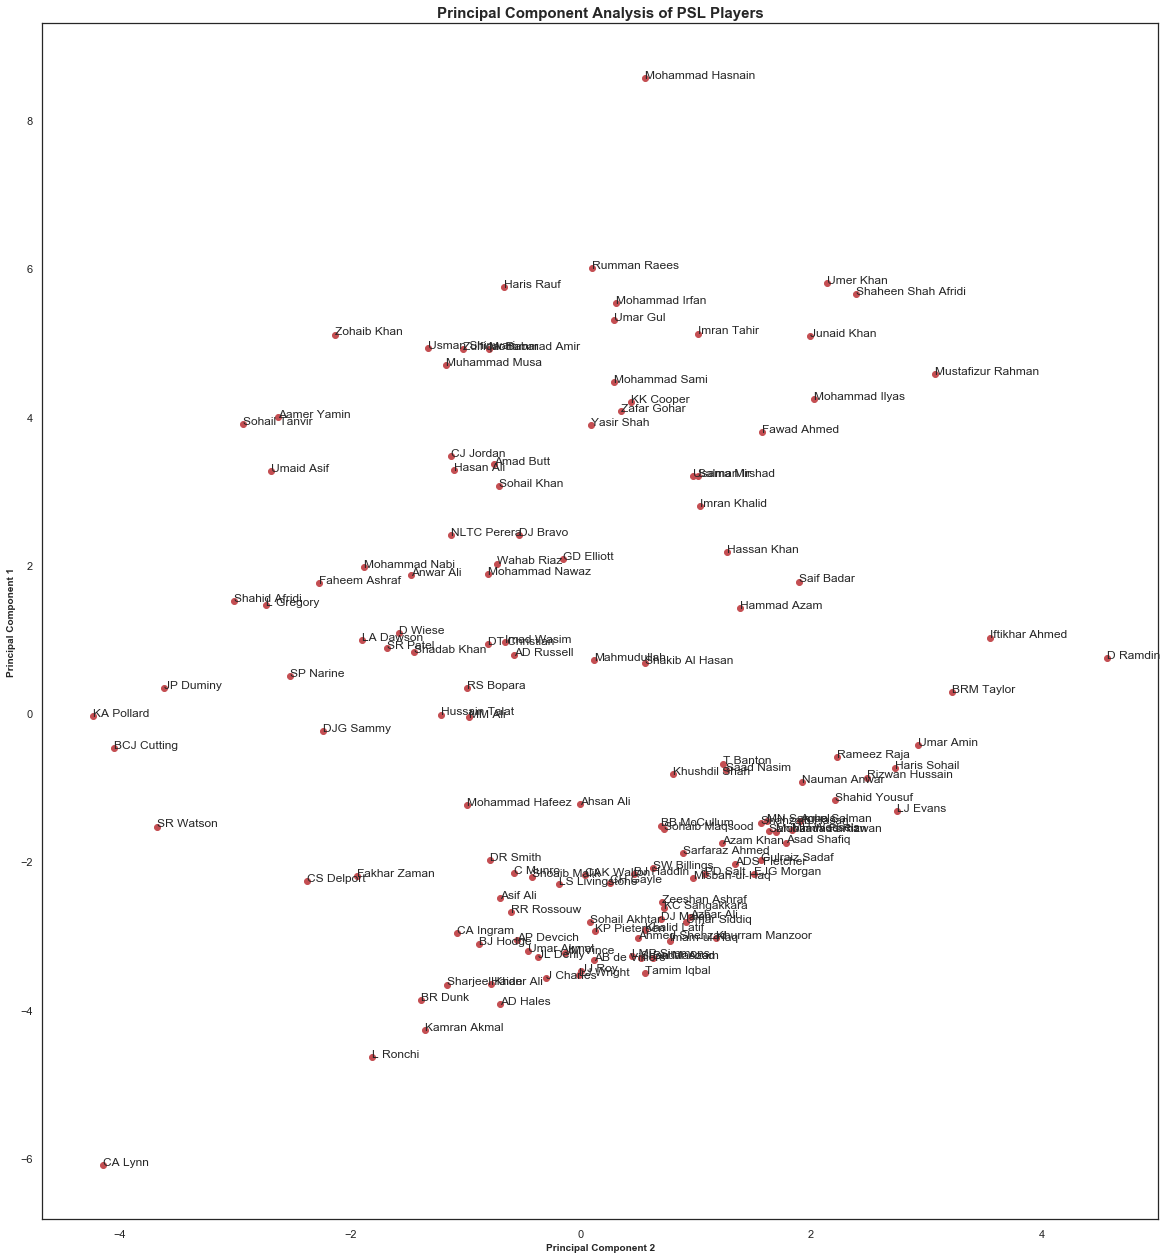

In [164]:
pca_data_2=apply_visualize_pca(2,data_scaled_2)


<Figure size 432x288 with 0 Axes>

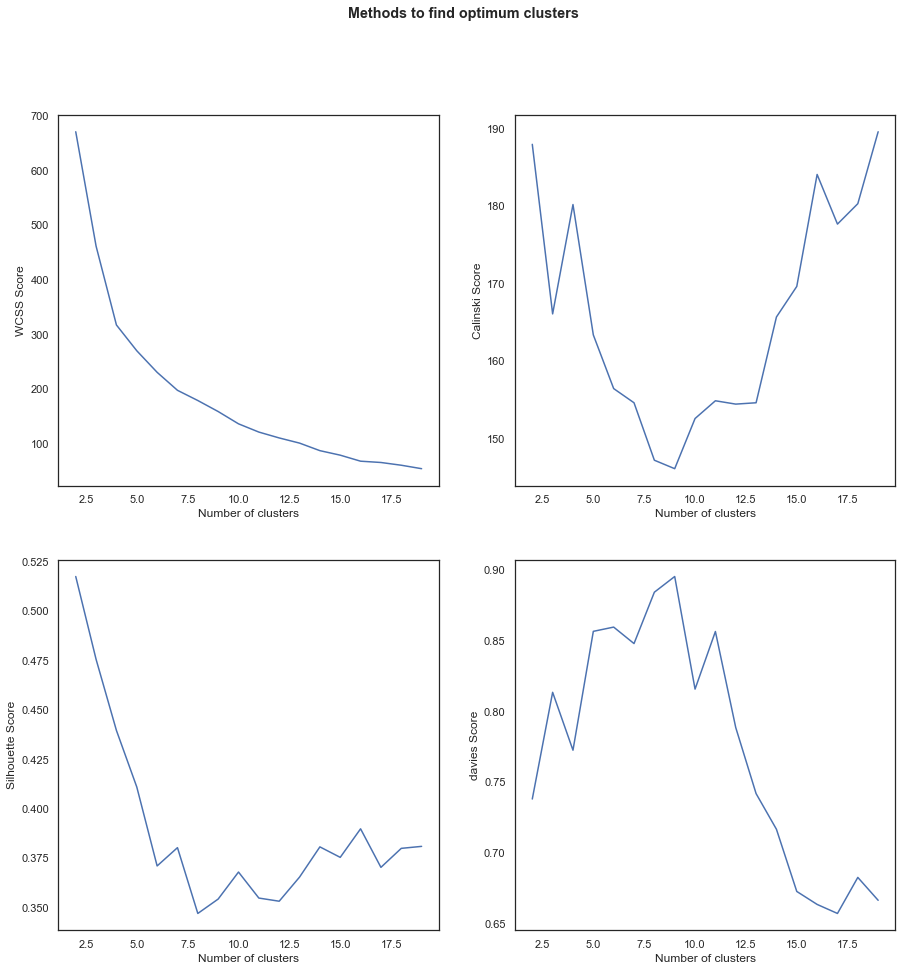

In [210]:
cs_list_kmeans2=[]
ss_list_kmeans2=[]
db_list_kmeans2=[]
wcss_kmeans2=[]

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(pca_data_2[['PC_1','PC_2']])
    labels=kmeans.labels_
    wcss=kmeans.inertia_
    wcss_kmeans2.append(wcss)
    cs=calinski_harabaz_score(pca_data_2[['PC_1','PC_2']],labels)
    cs_list_kmeans2.append(cs)
    ss=silhouette_score(pca_data_2[['PC_1','PC_2']],labels)
    ss_list_kmeans2.append(ss)
    db=davies_bouldin_score(pca_data_2[['PC_1','PC_2']],labels)
    db_list_kmeans2.append(db)
    

# Set canvas
sns.set(style='white')
sns.despine(left=True)
fig=plt.figure(figsize=(15,15))

#Create plot


plt.subplot(2,2,1)
plt.plot(range(2, 20), wcss_kmeans2)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Score')

plt.subplot(2,2,2)
plt.plot(range(2, 20), cs_list_kmeans2)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Score')


plt.subplot(2,2,3)
plt.plot(range(2, 20), ss_list_kmeans2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


plt.subplot(2,2,4)
plt.plot(range(2, 20), db_list_kmeans2)
plt.xlabel('Number of clusters')
plt.ylabel('davies Score')


# final touches
fig.suptitle('Methods to find optimum clusters',fontweight='semibold')
plt.show()


___Average:16___

In [166]:
kmeans_2= KMeans(n_clusters=16,max_iter=300)
kmeans_data_ar=kmeans_2.fit_predict(pca_data_2[['PC_1','PC_2']])
kmeans_labels_2=kmeans_2.labels_
    
    
player_clusters_km_2= pd.DataFrame({'Cluster A':pca_data_2.loc[kmeans_labels_2==0,'Player'],
                              'Cluster B':pca_data_2.loc[kmeans_labels_2==1,'Player'],
                              'Cluster C':pca_data_2.loc[kmeans_labels_2==2,'Player'],
                              'Cluster D':pca_data_2.loc[kmeans_labels_2==3,'Player'],
                                   'Cluster E':pca_data_2.loc[kmeans_labels_2==4,'Player'],
                                   'Cluster F':pca_data_2.loc[kmeans_labels_2==5,'Player'],
                                   'Cluster G':pca_data_2.loc[kmeans_labels_2==6,'Player'],
                                   'Cluster H':pca_data_2.loc[kmeans_labels_2==7,'Player'],
                                   'Cluster I':pca_data_2.loc[kmeans_labels_2==8,'Player'],
                                    'Cluster J':pca_data_2.loc[kmeans_labels_2==9,'Player'],
                                   'Cluster K':pca_data_2.loc[kmeans_labels_2==10,'Player'],
                                   'Cluster L':pca_data_2.loc[kmeans_labels_2==11,'Player'],
                                   'Cluster M':pca_data_2.loc[kmeans_labels_2==12,'Player'],
                                   'Cluster N':pca_data_2.loc[kmeans_labels_2==13,'Player'],
                                   'Cluster O':pca_data_2.loc[kmeans_labels_2==14,'Player'],
                                   'Cluster P':pca_data_2.loc[kmeans_labels_2==15,'Player']})  

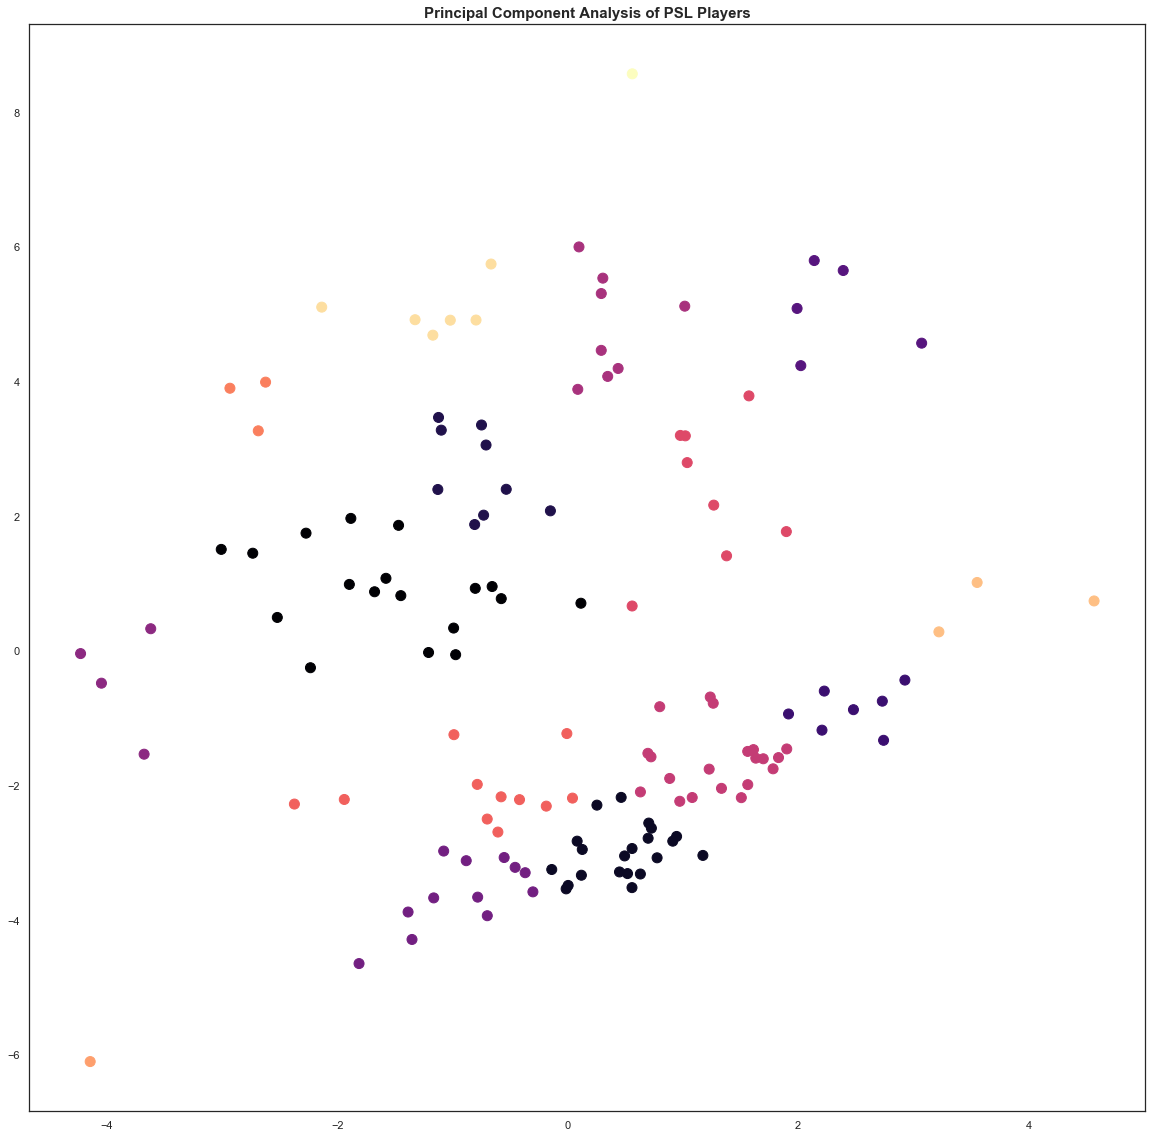

In [209]:
sns.set(style='white')
fig=plt.figure(figsize=(20,20))

## create plot
plt.scatter(pca_data_2.PC_2,pca_data_2.PC_1,c=kmeans_labels_2,s=100,cmap='magma')
    
## Labelling and final touches
plt.title('Principal Component Analysis of PSL Players',fontweight='semibold',fontsize=15)
ax.set_xlabel('Principal Component 2',fontsize=10,fontweight='semibold')
ax.set_ylabel('Principal Component 1',fontsize=10,fontweight='semibold')
plt.show()

<Figure size 432x288 with 0 Axes>

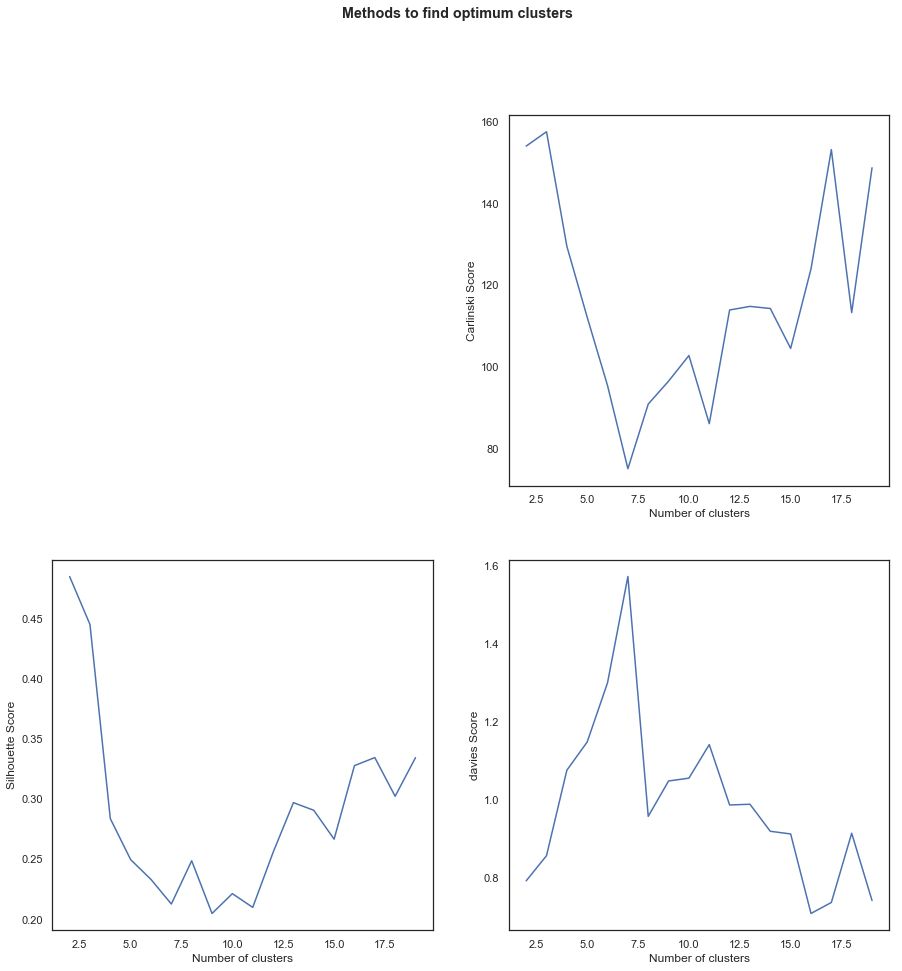

In [168]:
cs_list_gmm2=[]
ss_list_gmm2=[]
db_list_gmm2=[]
for i in range(2, 20):
    gmm = GMM(n_components=i, max_iter=300)
    gmm.fit(pca_data_2[['PC_1','PC_2']])
    labels=gmm.predict(pca_data_2[['PC_1','PC_2']])
    cs=calinski_harabaz_score(pca_data_2[['PC_1','PC_2']],labels)
    cs_list_gmm2.append(cs)
    ss=silhouette_score(pca_data_2[['PC_1','PC_2']],labels)
    ss_list_gmm2.append(ss)
    db=davies_bouldin_score(pca_data_2[['PC_1','PC_2']],labels)
    db_list_gmm2.append(db)
    

# Set canvas
sns.set(style='white')
sns.despine(left=True)
fig=plt.figure(figsize=(15,15))

#Create plot

plt.subplot(2,2,2)
plt.plot(range(2, 20), cs_list_gmm2)
plt.xlabel('Number of clusters')
plt.ylabel('Carlinski Score')


plt.subplot(2,2,3)
plt.plot(range(2, 20), ss_list_gmm2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')


plt.subplot(2,2,4)
plt.plot(range(2, 20), db_list_gmm2)
plt.xlabel('Number of clusters')
plt.ylabel('davies Score')


# final touches
fig.suptitle('Methods to find optimum clusters',fontweight='semibold')
plt.show()

CS : 16
SS : 16
DB:16

___Average:18___


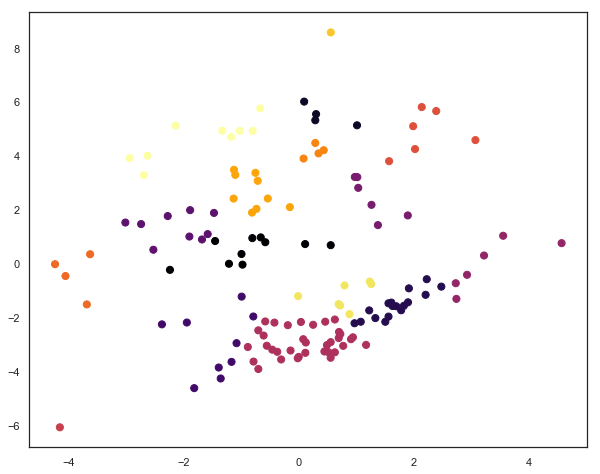

In [169]:
gmm_pi=GMM(n_components=16).fit(pca_data_2[['PC_1','PC_2']])
gmm_labels_2= gmm_pi.predict(pca_data_2[['PC_1','PC_2']])
probs=gmm_pi.predict_proba(pca_data_2[['PC_1','PC_2']])

## Create figure

plt.figure(figsize = (10,8))
plt.scatter(pca_data_2.loc[:, 'PC_2'], pca_data_2.loc[:,'PC_1'],c=gmm_labels_2 ,s=50, cmap='inferno')

In [170]:
player_clusters_gmm_2= pd.DataFrame({'Cluster A':Cleaned_All_Players_data_PI[gmm_labels_2==0]['Player'],
                                  'Cluster B':Cleaned_All_Players_data_PI[gmm_labels_2==1]['Player'],
                                  'Cluster C':Cleaned_All_Players_data_PI[gmm_labels_2==2]['Player'],
                                    'Cluster D':Cleaned_All_Players_data_PI[gmm_labels_2==3]['Player'],
                                    'Cluster E':Cleaned_All_Players_data_PI[gmm_labels_2==4]['Player'],
                                    'Cluster F':Cleaned_All_Players_data_PI[gmm_labels_2==5]['Player'],
                                    'Cluster G':Cleaned_All_Players_data_PI[gmm_labels_2==6]['Player'],
                                    'Cluster H':Cleaned_All_Players_data_PI[gmm_labels_2==7]['Player'],
                                    'Cluster I':Cleaned_All_Players_data_PI[gmm_labels_2==8]['Player'],
                                    'Cluster J':Cleaned_All_Players_data_PI[gmm_labels_2==9]['Player'],
                                    'Cluster K':Cleaned_All_Players_data_PI[gmm_labels_2==10]['Player'],
                                    'Cluster L':Cleaned_All_Players_data_PI[gmm_labels_2==11]['Player'],
                                    'Cluster M':Cleaned_All_Players_data_PI[gmm_labels_2==12]['Player'],
                                    'Cluster N':Cleaned_All_Players_data_PI[gmm_labels_2==13]['Player'],
                                    'Cluster O':Cleaned_All_Players_data_PI[gmm_labels_2==14]['Player'],
                                    'Cluster P':Cleaned_All_Players_data_PI[gmm_labels_2==15]['Player']})

In [171]:
# Let's calculate the davies score of each clustering
def cluster_scores(data,labels,string):
    score_1=davies_bouldin_score(data,labels)
    score_2=calinski_harabaz_score(data,labels)
    print("Scores of {} : \n DB score is {} and Calinski Score is {}".format(string,score_1,score_2))

In [172]:
cluster_scores(pca_data[['PC_1','PC_2']],kmeans_labels,'Kmeans for PCA_1 data')

Scores of Kmeans for PCA_1 data : 
 DB score is 0.6761946627250115 and Calinski Score is 174.75537392678783


In [173]:
cluster_scores(pca_data[['PC_1','PC_2']],gmm_labels,'GMM for PCA_1 data')

Scores of GMM for PCA_1 data : 
 DB score is 0.914149360306948 and Calinski Score is 116.36076243047914


In [174]:
cluster_scores(pca_data_2[['PC_1','PC_2']],kmeans_labels_2,'Kmeans for PCA_2 data')

Scores of Kmeans for PCA_2 data : 
 DB score is 0.6529390780595552 and Calinski Score is 172.03202142138653


In [175]:
cluster_scores(pca_data_2[['PC_1','PC_2']],gmm_labels_2,'GMM for PCA_2 data ')

Scores of GMM for PCA_2 data  : 
 DB score is 0.7598672447196696 and Calinski Score is 143.78020220763094


### Kmeans for PCA_2 is better has more compact clusters and has quite reasonable scores on both metrics.

### Exploring and Naming Clusters of kmeans for PCA_2 data

In [222]:
list(Cleaned_All_Players_data_PI[kmeans_labels_2 == 1]['Player'])

['AB de Villiers',
 'Ahmed Shehzad',
 'Azhar Ali',
 'BJ Haddin',
 'Babar Azam',
 'CH Gayle',
 'DJ Malan',
 'Imam-ul-Haq',
 'JJ Roy',
 'JM Vince',
 'KC Sangakkara',
 'KP Pietersen',
 'Khalid Latif',
 'Khurram Manzoor',
 'LJ Wright',
 'LMP Simmons',
 'Shan Masood',
 'Sohail Akhtar',
 'Tamim Iqbal',
 'Umar Siddiq',
 'Zeeshan Ashraf']

Text(0.5, 1.0, ' Cluster B Vs all the other Clusters')

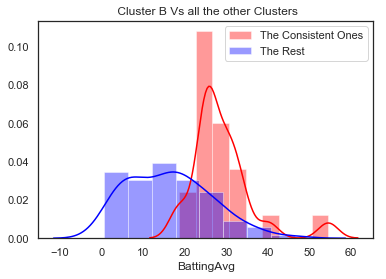

In [221]:
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 == 1]['BattingAvg'].astype('float'),color='red',label='The Consistent Ones')
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 != 1]['BattingAvg'].astype('float'),color='blue',label='The Rest')

plt.xlabel('BattingAvg')
plt.legend(loc='best')
plt.title(' Cluster B Vs all the other Clusters')

Text(0.5, 1.0, 'BP% Vs all the other Clusters')

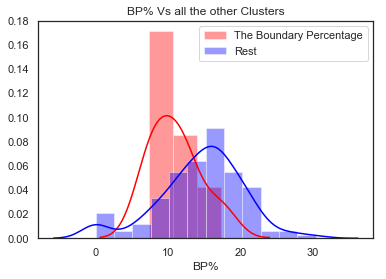

In [177]:
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 == 3]['BP%'].astype('float'),color='red',label='The Boundary Percentage') 
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 != 3]['BP%'].astype('float'),color='blue',label='Rest')

plt.xlabel('BP%')
plt.legend(loc='best')
plt.title('BP% Vs all the other Clusters')

Text(0.5, 0.98, 'Cluster D Vs all the other Clusters')

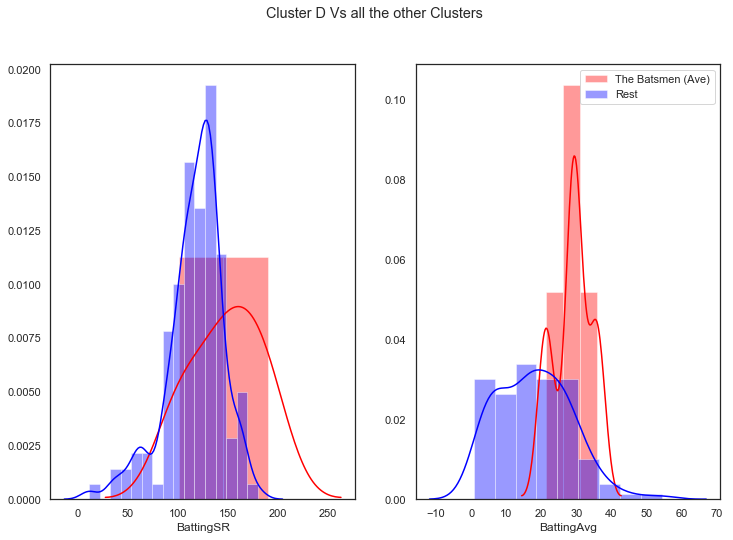

In [178]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 == 6]['BattingSR'].astype('float'),color='red',label='The Batsmen (SR)')
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 != 6]['BattingSR'].astype('float'),color='blue',label='Rest')

plt.subplot(1,2,2)
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 == 6]['BattingAvg'].astype('float'),color='red',label='The Batsmen (Ave)')
sns.distplot(Cleaned_All_Players_data[kmeans_labels_2 != 6]['BattingAvg'].astype('float'),color='blue',label='Rest')


plt.legend(loc='best')
plt.suptitle('Cluster D Vs all the other Clusters')

## Quetta Gladiator 2019 Winner Team

In [179]:
Team_2019=['Sarfaraz Ahmed', 'Umar Akmal', 'Ahmed Shehzad', 'SR Watson', 'RR Rossouw', 'Mohammad Nawaz', 'Anwar Ali',
           'Azam Khan', 'Saud Shakeel', 'SP Narine', 'Sohail Tanvir', 'DJ Bravo', 'Fawad Ahmed', 'Jalat Khan', 
           'Mohammad Asghar', 'Danish Aziz', 'Ahsan Ali', 'Ghulam Mudassar','Naseem Shah', 'HF Gurney','Mohammad Hasnain',
           'Mohammad Irfan']

In [180]:
Players_in_Clusters_2019={}
for c in player_clusters_km_2.columns:
    x=list(set(Team_2019).intersection(player_clusters_km_2[c]))
    if x:
        print(x,c)
        Players_in_Clusters_2019[c]=x

['SP Narine', 'Anwar Ali'] Cluster A
['Ahmed Shehzad'] Cluster B
['Mohammad Nawaz', 'DJ Bravo'] Cluster C
['Umar Akmal'] Cluster F
['SR Watson'] Cluster G
['Mohammad Irfan'] Cluster H
['Sarfaraz Ahmed', 'Azam Khan'] Cluster I
['Fawad Ahmed'] Cluster J
['Ahsan Ali', 'RR Rossouw'] Cluster K
['Sohail Tanvir'] Cluster L
['Mohammad Hasnain'] Cluster P


In [181]:
team_2019_df=pd.DataFrame.from_dict(Players_in_Clusters_2019,orient='index').T

In [182]:
team_2019_df

,Cluster A,Cluster B,Cluster C,Cluster F,Cluster G,Cluster H,Cluster I,Cluster J,Cluster K,Cluster L,Cluster P
0,SP Narine,Ahmed Shehzad,Mohammad Nawaz,Umar Akmal,SR Watson,Mohammad Irfan,Sarfaraz Ahmed,Fawad Ahmed,Ahsan Ali,Sohail Tanvir,Mohammad Hasnain
1,Anwar Ali,None,DJ Bravo,None,None,None,Azam Khan,None,RR Rossouw,None,None


## Islamabad United 2018

In [183]:
Team_2018=['Misbah-ul-Haq','AD Hales', 'Asif Ali', 'JP Duminy', 'Iftikhar Ahmed', 'Sahibzada Farhan',
           'Amad Butt', 'AD Russell', 'Faheem Ashraf', 'Shadab Khan', 'Hussain Talat', 'Samit Patel','SW Billings',
           'L Ronchi', 'Mohammad Hasan', 'CAK Walton', 'Rohail Nazir','Mohammad Sami', 'Steven Finn', 
           'Rumman Raees','Samuel Badree', 'Zafar Gohar']

In [184]:
len(Team_2018)

22

In [185]:
Players_in_Clusters_2018={}
for c in player_clusters_km_2.columns:
    x=list(set(Team_2018).intersection(player_clusters_km_2[c]))
    if x:
        print(x,c)
        Players_in_Clusters_2018[c]=x

['Hussain Talat', 'Shadab Khan', 'AD Russell', 'Faheem Ashraf'] Cluster A
['Amad Butt'] Cluster C
['L Ronchi', 'AD Hales'] Cluster F
['JP Duminy'] Cluster G
['Mohammad Sami', 'Rumman Raees', 'Zafar Gohar'] Cluster H
['SW Billings', 'Sahibzada Farhan', 'Misbah-ul-Haq'] Cluster I
['CAK Walton', 'Asif Ali'] Cluster K
['Iftikhar Ahmed'] Cluster N


In [186]:
team_2018_df=pd.DataFrame.from_dict(Players_in_Clusters_2018,orient='index').T

In [187]:
team_2018_df

,Cluster A,Cluster C,Cluster F,Cluster G,Cluster H,Cluster I,Cluster K,Cluster N
0,Hussain Talat,Amad Butt,L Ronchi,JP Duminy,Mohammad Sami,SW Billings,CAK Walton,Iftikhar Ahmed
1,Shadab Khan,None,AD Hales,None,Rumman Raees,Sahibzada Farhan,Asif Ali,None
2,AD Russell,None,None,None,Zafar Gohar,Misbah-ul-Haq,None,None
3,Faheem Ashraf,None,None,None,None,None,None,None


In [188]:
Both_teams_df= pd.concat([team_2018_df,team_2019_df],axis=0,ignore_index=True)

In [189]:
x_arr= list(set(player_clusters_km_2.columns)-set(Both_teams_df.columns))
for i in x_arr:
    Both_teams_df[i]=np.nan
Both_teams_df.columns=Both_teams_df.columns.sort_values()

In [190]:
for i in range(Both_teams_df.shape[0]):
    for j in Both_teams_df.columns:
        if Both_teams_df.loc[i,j] == None:
            Both_teams_df.loc[i,j] = np.nan

In [191]:
Both_teams_df

,Cluster A,Cluster B,Cluster C,Cluster D,Cluster E,Cluster F,Cluster G,Cluster H,Cluster I,Cluster J,Cluster K,Cluster L,Cluster M,Cluster N,Cluster O,Cluster P
0,Hussain Talat,NaN,Amad Butt,L Ronchi,JP Duminy,Mohammad Sami,SW Billings,NaN,CAK Walton,NaN,Iftikhar Ahmed,NaN,NaN,NaN,NaN,NaN
1,Shadab Khan,NaN,NaN,AD Hales,NaN,Rumman Raees,Sahibzada Farhan,NaN,Asif Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD Russell,NaN,NaN,NaN,NaN,Zafar Gohar,Misbah-ul-Haq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Faheem Ashraf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP Narine,Ahmed Shehzad,Mohammad Nawaz,Umar Akmal,SR Watson,Mohammad Irfan,Sarfaraz Ahmed,Fawad Ahmed,Ahsan Ali,Sohail Tanvir,NaN,Mohammad Hasnain,NaN,NaN,NaN,NaN
5,Anwar Ali,NaN,DJ Bravo,NaN,NaN,NaN,Azam Khan,NaN,RR Rossouw,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
percent_list=[]
for i in Both_teams_df.columns:
    x=Both_teams_df[i].notnull().sum()
    percent=np.round(np.divide(x,Both_teams_df.notnull().sum().sum()) * 100,1)
    percent_list.append(percent)

In [193]:
Both_teams_df.loc[Both_teams_df.index[-1]+1]=percent_list

In [194]:
Both_teams_df

,Cluster A,Cluster B,Cluster C,Cluster D,Cluster E,Cluster F,Cluster G,Cluster H,Cluster I,Cluster J,Cluster K,Cluster L,Cluster M,Cluster N,Cluster O,Cluster P
0,Hussain Talat,NaN,Amad Butt,L Ronchi,JP Duminy,Mohammad Sami,SW Billings,NaN,CAK Walton,NaN,Iftikhar Ahmed,NaN,NaN,NaN,NaN,NaN
1,Shadab Khan,NaN,NaN,AD Hales,NaN,Rumman Raees,Sahibzada Farhan,NaN,Asif Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD Russell,NaN,NaN,NaN,NaN,Zafar Gohar,Misbah-ul-Haq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Faheem Ashraf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP Narine,Ahmed Shehzad,Mohammad Nawaz,Umar Akmal,SR Watson,Mohammad Irfan,Sarfaraz Ahmed,Fawad Ahmed,Ahsan Ali,Sohail Tanvir,NaN,Mohammad Hasnain,NaN,NaN,NaN,NaN
5,Anwar Ali,NaN,DJ Bravo,NaN,NaN,NaN,Azam Khan,NaN,RR Rossouw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18.8,3.1,9.4,9.4,6.2,12.5,15.6,3.1,12.5,3.1,3.1,3.1,0.0,0.0,0.0,0.0


### 2020 Teams

In [195]:
Quetta_Glad_2020=['Mohammad Nawaz', 'Sarfaraz Ahmed', 'JJ Roy','SR Watson','Ahmed Shehzad', 'BCJ Cutting','Umar Akmal',
             'Mohammad Hasnain', 'Fawad Ahmed','Ahsan Ali', 'Naseem Shah', 'Sohail Khan', 'Tymal Mills', 'Abdul Nasir',
             'Arish Ali Khan', 'Azam Khan','Keemo Paul', 'Khurram Manzoor']

In [196]:
Lahore_Qaland_2020=['Fakhar Zaman', 'Mohammad Hafeez', 'CA Lynn','Shaheen Shah Afridi','David Wiese', 'Usman Shinwari',
                    'Haris Rauf', 'Sohail Akhtar', 'Samit Patel','Salman Butt', 'Seekkuge Prsanna', 'BR Dunk', 
                    'Farzan Raja', 'Jaahid Ali','M Faizan','LMP Simmons', 'Dilbar Hussain']

In [197]:
Multan_Sult_2020=['Mohammad Irfan', 'Moeen Ali', 'RR Rossouw','Shahid Afridi','Zeeshan Ashraf','Ravi Bopara','JM Vince',
                  'Junaid Khan', 'Sohail Tanvir','Ali Shafiq', 'Shan Masood', 'Khushdil Shah', 'Usman Qadir', 'Fabian Allen',
                  'Mohammad Ilyas', 'Rohail Nazir','Imran Tahir', 'Bilawal Bhatti']

In [198]:
Islamabad_Utd_2020=['Shadab Khan', 'Dale Steyn', 'CA Ingram','Faheem Ashraf','Asif Ali', 'C Munro','Hussain Talat', 
                    'Rumman Raees','Amad Butt', 'Musa Khan', 'Rizwan Hussain', 'Zafar Gohar', 'PD Salt','Aqif Javed', 
                    'Ahmed Safi Abdullah','Saif Badar', 'Rassie van der Dussen']

In [199]:
Peshawar_Zalmi_2020=['Hasan Ali', 'KA Pollard', 'Wahab Riaz','Kamran Akmal','T Banton', 'Shoaib Malik',
               'Imam-ul-Haq', 'LA Dawson','Umar Amin', 'Mohammad Mohsin', 'Rahat Ali', 'Dwaine Pretorius', 'Adil Amin',
               'Amir Khan', 'Amir Ali','LS Livingstone', 'Haider Ali Khan']

In [200]:
Karachi_Kings_2020=['Babar Azam', 'Mohammad Amir', 'AD Hales','Imad Wasim','Iftikhar Ahmed', 'CJ Jordan',
                    'Aamir Yamin', 'Sharjeel Khan', 'CS Delport','Usama Mir', 'Mohammad Rizwan', 'Umaid Asif'
                    , 'Dan Lawrance', 'Ali Khan','Umer Khan', 'Arshad Iqbal','Liam Plunkett', 'Awais Zia']

In [201]:
def Players_in_Clusters(Team):
    Cluster_dict={}
    for c in player_clusters_km_2.columns:
        x=list(set(Team).intersection(player_clusters_km_2[c]))
        if x:
            Cluster_dict[c]=x
        else:
            Cluster_dict[c]=list()
    return Cluster_dict

In [202]:
peshawar_dict_df=pd.DataFrame.from_dict(Players_in_Clusters(Peshawar_Zalmi_2020),orient='index').T
lahore_dict_df=pd.DataFrame.from_dict(Players_in_Clusters(Lahore_Qaland_2020),orient='index').T
multan_dict_df=pd.DataFrame.from_dict(Players_in_Clusters(Multan_Sult_2020),orient='index').T
karachi_dict_df=pd.DataFrame.from_dict(Players_in_Clusters(Karachi_Kings_2020),orient='index').T
islamabad_dict_df=pd.DataFrame.from_dict(Players_in_Clusters(Islamabad_Utd_2020),orient='index').T
quetta_dict_df=pd.DataFrame.from_dict(Players_in_Clusters(Quetta_Glad_2020),orient='index').T

In [203]:
def finding_percentages(p):
    percent_list=[]
    c_arr=p.columns
    for i in c_arr:
        percent=np.round(np.divide(p[i].notnull().sum(),p.notnull().sum().sum()) * 100,1)
        percent_list.append(percent)
    return percent_list

In [204]:
peshawar_percent=finding_percentages(peshawar_dict_df)
karachi_percent=finding_percentages(karachi_dict_df)
lahore_percent=finding_percentages(lahore_dict_df)
quetta_percent=finding_percentages(quetta_dict_df)
islamabad_percent=finding_percentages(islamabad_dict_df)
multan_percent=finding_percentages(multan_dict_df)

In [227]:
percent_df=pd.DataFrame(data={'Past_Champion_Teams':Both_teams_df.iloc[-1],'Peshawar':peshawar_percent,'Karachi':karachi_percent,
                              'Lahore':lahore_percent,
                              'Quetta':quetta_percent,'Islamabad':islamabad_percent,'Multan':
                             multan_percent,})

In [228]:
percent_df.style.background_gradient(cmap='Blues')

,Past_Champion_Teams,Peshawar,Karachi,Lahore,Quetta,Islamabad,Multan
Cluster A,18.8,10,8.3,0,0,25,9.1
Cluster B,3.1,10,8.3,22.2,23.1,0,27.3
Cluster C,9.4,20,8.3,0,15.4,8.3,0
Cluster D,9.4,10,0,0,0,8.3,0
Cluster E,6.2,0,8.3,11.1,0,0,18.2
Cluster F,12.5,10,16.7,11.1,7.7,8.3,0
Cluster G,15.6,10,0,0,15.4,0,0
Cluster H,3.1,0,0,0,0,16.7,18.2
Cluster I,12.5,10,8.3,0,15.4,8.3,9.1
Cluster J,3.1,0,8.3,0,7.7,8.3,0
